**VA BENE! E' LA SCELTA HAMILTONIANA DI RUTHOTTO**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
plt.close('all')

In [ ]:
input_training = np.random.rand(3000,4)
input_training[:,2] = np.zeros(3000)
input_training[:,3] = np.zeros(3000)


def label(data):
  l = len(data[:,0])
  etichetta = np.zeros((l,1))
  
  for i in range(l):
    if (data[i,1]-0.5)**2+(data[i,0]-0.5)**2<1/9:
      etichetta[i][0] = 1

  return(etichetta)

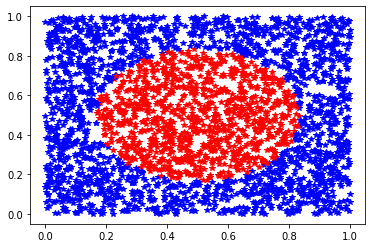

In [ ]:
input_label = label(input_training)

for i in range(len(input_label[:,0])):
  if input_label[i,0]==1:
    plt.plot(input_training[i,0],input_training[i,1],'r-*')
  else:
    plt.plot(input_training[i,0],input_training[i,1],'b-*')


In [ ]:
input_test = np.random.rand(400,4)
input_test[:,2] = np.zeros(400)
input_test[:,3] = np.zeros(400)


label_test = label(input_test)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(20, activation = 'relu'))
model.add(layers.Dense(20,activation = 'relu'))
model.add(layers.Dense(20,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid')) #output layer

In [ ]:
import keras.optimizers as optimizers
opt = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['acc'])
history = model.fit(input_training, input_label, epochs=20)

Epoch 1/20
94/94 [==============================] - 0s 1ms/step - loss: 0.1935 - acc: 0.6723
Epoch 2/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0881 - acc: 0.9197
Epoch 3/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0485 - acc: 0.9470
Epoch 4/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0296 - acc: 0.9640
Epoch 5/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0282 - acc: 0.9610
Epoch 6/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0364 - acc: 0.9497
Epoch 7/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0295 - acc: 0.9583
Epoch 8/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0269 - acc: 0.9607
Epoch 9/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0266 - acc: 0.9613
Epoch 10/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0278 - acc: 0.9573
Epoch 11/20
94/94 [==============================] - 0s 1ms/step - lo

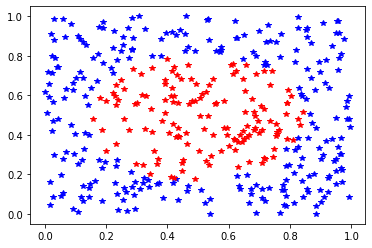

In [ ]:
v = model.predict(input_test)
for i in range(len(v)):
  if v[i]>0.5:
    plt.plot(input_test[i,0],input_test[i,1],'r-*')
  else:
    plt.plot(input_test[i,0],input_test[i,1],'b*')

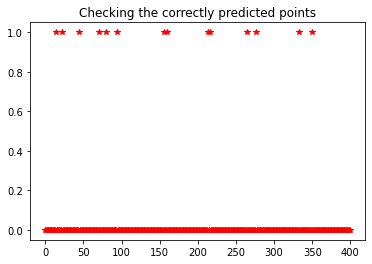

In [ ]:
for i in range(len(v)):
  if v[i]>0.5:
    v[i] = 1
  else:
    v[i] = 0

r = np.abs(v-label_test)
plt.plot(range(len(v)),r,'r*')
plt.title('Checking the correctly predicted points')
plt.show()

In [ ]:
import tensorflow as tf
from keras import activations
from keras import layers


class Nuovo(layers.Layer):
  def __init__(self, units):
    super(Nuovo, self).__init__()
    self.units = units
  
  def call(self, inputs):

    A = self.w
    l = len(A[:][0])

    Mat1 = tf.concat([tf.zeros([l,l]), self.w], 1)
    Mat2 = tf.concat([tf.negative(self.w),tf.zeros([l,l])], 1)
    
    Mat = tf.concat([Mat1,Mat2],0)

    vec = tf.multiply(0.01,activations.tanh(tf.matmul(inputs,Mat) + self.b))
    vec = tf.add(inputs,vec)

    return vec
  
  def build(self, input_shape):
    self.w = self.add_weight(
        name = 'w',
        shape=(input_shape[-1]//2, self.units//2),
        initializer = 'random_normal',
        trainable = True,
    )

    self.b = self.add_weight(
        name='b',
        shape=(self.units,),
        initializer='zeros',
        trainable=True,
    )

In [ ]:
model2 = models.Sequential()
nlayer = 100

for i in range(nlayer):
  model2.add(Nuovo(4))

model2.add(layers.Dense(1,activation = 'sigmoid')) #output layer

In [ ]:
import keras.optimizers as optimizers
opt = optimizers.Adam(learning_rate=0.01)
model2.compile(optimizer=opt, loss='mean_squared_error', metrics=['acc']);
history = model2.fit(input_training, input_label, epochs=200);

Epoch 1/200
94/94 [==============================] - 1s 8ms/step - loss: 0.2286 - acc: 0.6563
Epoch 2/200
94/94 [==============================] - 1s 9ms/step - loss: 0.2277 - acc: 0.6563
Epoch 3/200
94/94 [==============================] - 1s 9ms/step - loss: 0.2261 - acc: 0.6563
Epoch 4/200
94/94 [==============================] - 1s 9ms/step - loss: 0.2253 - acc: 0.6563
Epoch 5/200
94/94 [==============================] - 1s 9ms/step - loss: 0.2256 - acc: 0.6563
Epoch 6/200
94/94 [==============================] - 1s 9ms/step - loss: 0.2249 - acc: 0.6563
Epoch 7/200
94/94 [==============================] - 1s 9ms/step - loss: 0.2238 - acc: 0.6563
Epoch 8/200
94/94 [==============================] - 1s 8ms/step - loss: 0.2221 - acc: 0.6563
Epoch 9/200
94/94 [==============================] - 1s 9ms/step - loss: 0.2183 - acc: 0.6563
Epoch 10/200
94/94 [==============================] - 1s 9ms/step - loss: 0.2125 - acc: 0.6563
Epoch 11/200
94/94 [==============================] - 1s 10

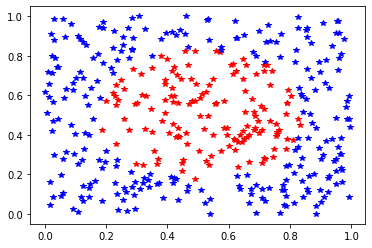

In [ ]:
v = model2.predict(input_test)
for i in range(len(v)):
  if v[i]>0.5:
    plt.plot(input_test[i,0],input_test[i,1],'r-*')
  else:
    plt.plot(input_test[i,0],input_test[i,1],'b*')

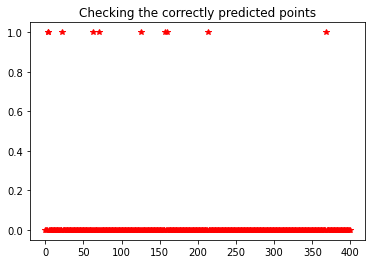

In [ ]:
for i in range(len(v)):
  if v[i]>0.5:
    v[i] = 1
  else:
    v[i] = 0

r = np.abs(v-label_test)
plt.plot(range(len(v)),r,'r*')
plt.title('Checking the correctly predicted points')
plt.show()

In [ ]:
from keras import Model
extractor = Model(inputs=model2.inputs,
                        outputs=[layer.output for layer in model2.layers])
features = extractor(input_test)
#print(features[:][:][50]) #returns the output of the 50th layer, which is always a list of size 200x3 a part for the last layer which is 200x1

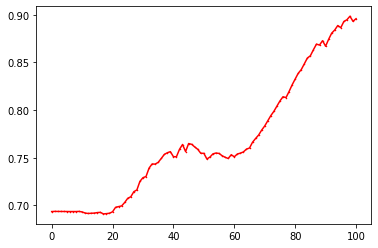

In [ ]:
def baricenter(data):
  
  l,v = data.get_shape()
  b = tf.reduce_sum(data, 0)
  b = tf.multiply(1/l,b)
  b = tf.reshape(b,[1,v])
  return b

def distanceMax(data):
  b = baricenter(data)
  l,v = data.get_shape()
  b = tf.repeat(b,repeats=[l],axis=0)
  diff = tf.math.subtract(data,b)
  n = tf.norm(diff, ord='euclidean', axis=1)
  return tf.math.reduce_max(n)

distanze = []
distanze.append(distanceMax(tf.convert_to_tensor(input_test)))

for i in range(0,nlayer):
  f = features[:][:][i]
  distanze.append(distanceMax(tf.convert_to_tensor(f)))

plt.plot(np.arange(nlayer+1),distanze,'r-*',Markersize=1)